In [9]:
import pandas as pd
pd.set_option('max_colwidth', 80)

from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import sklearn
import seaborn as sns
import spacy


def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d


nlp = spacy.load('en')

def clean_twitter(s):
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """
    
    s = sub(pattern= r'(:)|(^[a-zA-Z0-9]+)|(@\w+)|(#\w+)|(RT)', repl="",string=s)
    s = sub(pattern= r'([https://|http://]?[a-zA-Z\d\/]+[\.]+[a-zA-Z\d\/\.]+)', repl="",string=s)
   
    
    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable! 
       
    doc = nlp(s)
    " ".join([token.lemma_ for token in doc])  

    # BONUS: Try using the library "spacy" to 
    # do further processing, such as lemmatizing
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    # or adding the part of speech or dependency code to the word 

    return s

In [10]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label
X.map(clean_twitter)

0         Here's CNN on Sharia law. You can be stoned or have your hands cut off,  "...
1         LOOK obama Clinton cronies ILLEGALLY arm &amp; train muslims terrorist inc...
2                                                         from 2013  gets crowned     …
3                                                Say 'Islam is peace', or else!        
4                                                       All aboard the Trump Train!  🚂 
5          FLASHBACK &gt;&gt; Judicial Watch Releases Huma Abedin Deposition Testimony 
6            Following FBI presser,  says “the system is rigged!”  &amp;  weigh in  7pm
7                                         Trump "We're Running Against a Rigged Press" 
8         Literally 98% of Hillary supporters I see online are astroturfed spammers ...
9                                                                         \nIslam. ... 
10                          .\nPSYCHO - MOTHER\nHillary at her most EVIL.\n\n   \n   h…
11        The unthinkable has ha

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

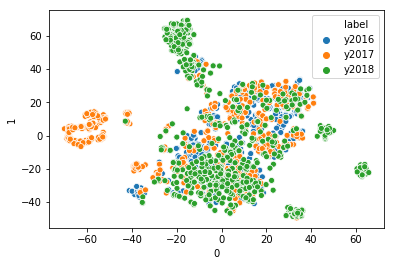

In [12]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer(ngram_range=(1,3))
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

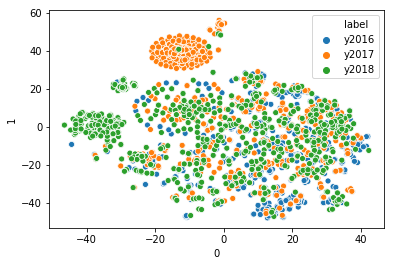

In [13]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter, ngram_range=(1,3))
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

In [ ]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way? 

vectorizer = TfidfVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)
